<a href="https://colab.research.google.com/github/SharonPepple/DataScience_salaries/blob/main/Data_Science_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analysis of Data Science Salaries from 2020 to 2023**

##**Project Overview**
##Introduction

The purpose of this data science project is to analyze and gain insights from a dataset containing information on data science salaries. This dataset comprises various columns, including work_year, experience_level, employment_type, job_title, salary_in_usd, employee_residence, remote_ratio, company_location, and company_size. The project aims to uncover patterns, trends, and factors that influence data science salaries, providing valuable information for both data science professionals and employers.

**Problem Statement:**

The project aims to address the following key questions:

- How have data science salaries evolved over the years?
- What is the impact of experience level on data science salaries?
- Which employment types offer the highest salaries for data science professionals?
- Are there specific job titles that command higher salaries within the field?
- Is there a correlation between company size and data science salaries?

###Goals

*   Salary Trends Analysis: Investigate how data science salaries have evolved over the years.
*  Experience-Level Impact: Examine the correlation between experience level and salary to understand how experience influences earnings.
*   Employment Types: Compare salaries across different employment types to determine which offer the most lucrative opportunities.
*   Job Titles Analysis: Explore the relationship between job_title and salary to identify high-demand roles.
*   Company Size Influence: Analyze whether company_size affects data science salaries.



##**Scope**

Data Collection

The dataset used in this project was obtained from Kaggle (www.kaggle.com).
Kaggle is a popular platform for sharing and accessing datasets for data analysis and machine learning projects.
The specific dataset used is [https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023].


In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries for EDA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



Data Preprocessing

In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ds_salaries.csv')

In [4]:
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
# Columns that are not used are dropped
columns_to_drop = ["salary", "salary_currency"]
df.drop(columns=columns_to_drop, inplace=True)


In [6]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [7]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   int64 
 7   company_location    3755 non-null   object
 8   company_size        3755 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.1+ KB
None


In [8]:
# Display summary statistics of numeric columns
df.describe()

,work_year,salary_in_usd,remote_ratio
count,3755.000000,3755.000000,3755.000000
mean,2022.373635,137570.389880,46.271638
std,0.691448,63055.625278,48.589050
min,2020.000000,5132.000000,0.000000
25%,2022.000000,95000.000000,0.000000
50%,2022.000000,135000.000000,0.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


In [9]:
# Check for missing values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
# Replace "FL" with "FT" in the "employment_type" column
df['employment_type'] = df['employment_type'].str.replace('FL', 'FT')


Exploratory Data Analysis

Salary distribution over the years using a Histogram

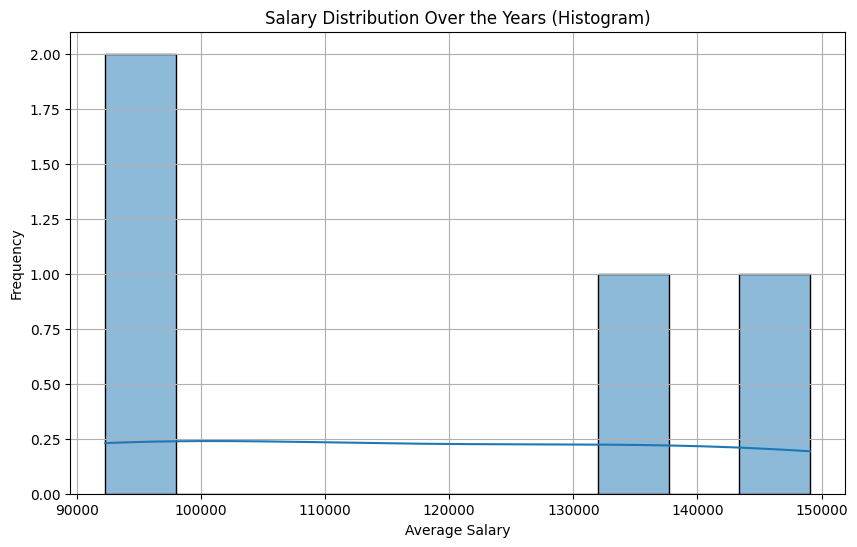

In [11]:
# Filter and group the data by 'work_year' and calculate the mean salary for each year

yearly_salary_mean = df.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Create a histogram using Seaborn for an informative plot

plt.figure(figsize=(10, 6))
sns.histplot(data=yearly_salary_mean, x='salary_in_usd', bins=10, kde=True)
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution Over the Years (Histogram)')
plt.grid(True)
plt.show()


Trends in Salaries across the years using Bar Plots

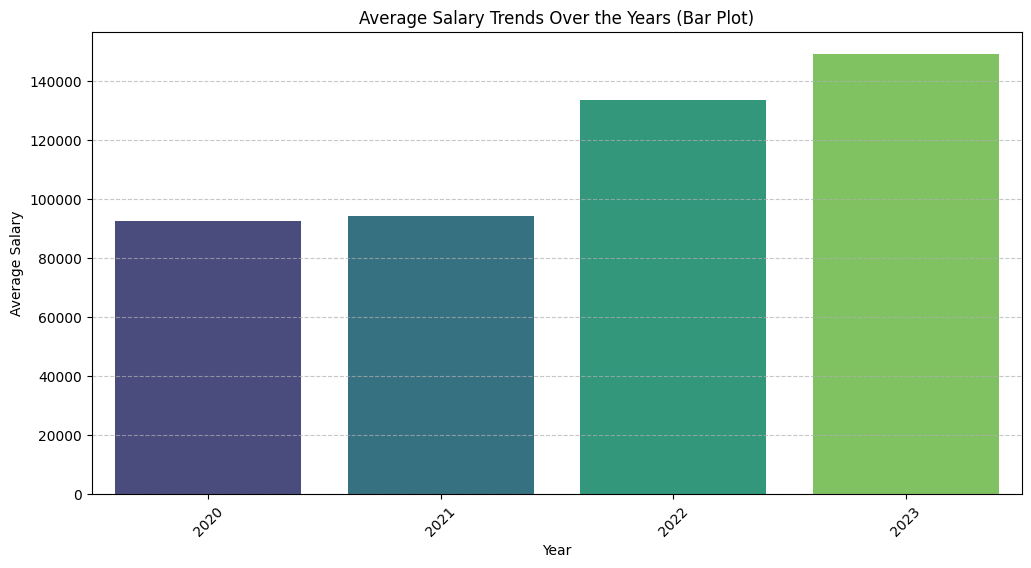

In [12]:
# Create a bar plot using Seaborn

plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_salary_mean, x='work_year', y='salary_in_usd', palette='viridis')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.title('Average Salary Trends Over the Years (Bar Plot)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Outliers in salaries using box plot

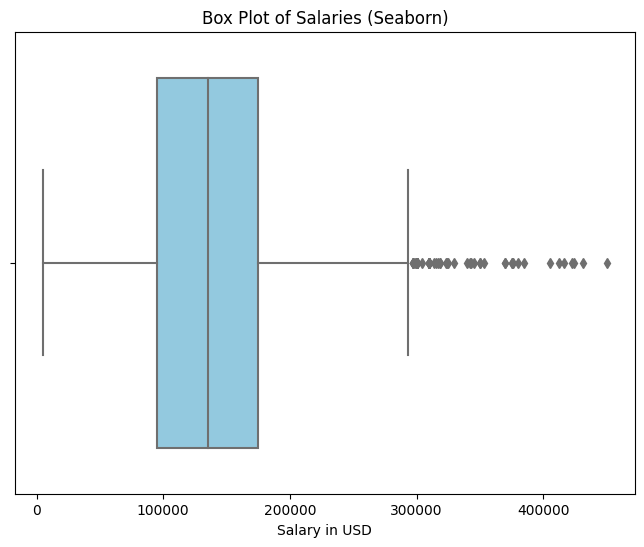

In [13]:
#Create a box plot using Seaborn to show outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['salary_in_usd'], color='skyblue')
plt.xlabel('Salary in USD')
plt.title('Box Plot of Salaries (Seaborn)')
plt.show()


Do more experienced data scientists earn higher salaries?

Salary Vs Experience Level


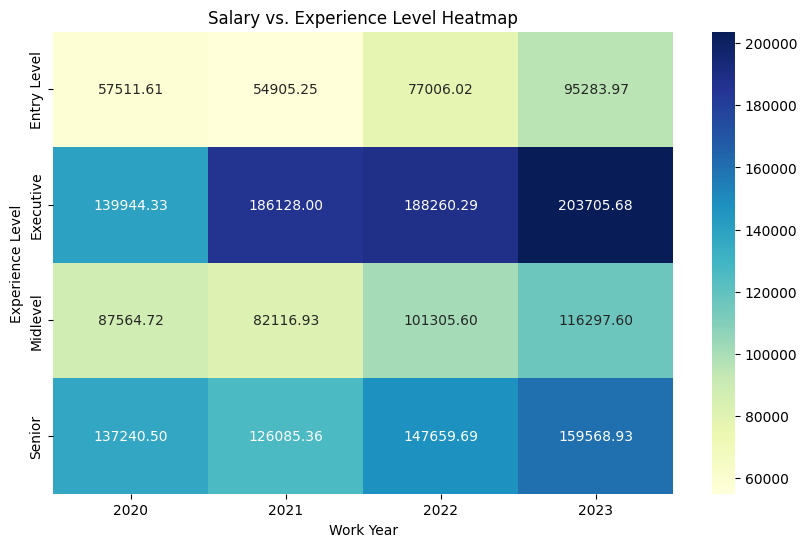

In [14]:
# Map the experience level labels to more informative names
experience_level_mapping = {
    'SE': 'Senior',
    'EX': 'Executive',
    'EN': 'Entry Level',
    'MI': 'Midlevel'
}

df['experience_level'] = df['experience_level'].map(experience_level_mapping)

# Create a pivot table to prepare data for the heatmap
pivot_df = df.pivot_table(index='experience_level', columns='work_year', values='salary_in_usd', aggfunc='mean')

# Create a heatmap using Seaborn

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot= True, fmt=".2f", cmap='YlGnBu')
plt.title('Salary vs. Experience Level Heatmap')
plt.xlabel('Work Year')
plt.ylabel('Experience Level')
plt.show()

Do onsite employees generally earn more than hybrid or fully remote workers?

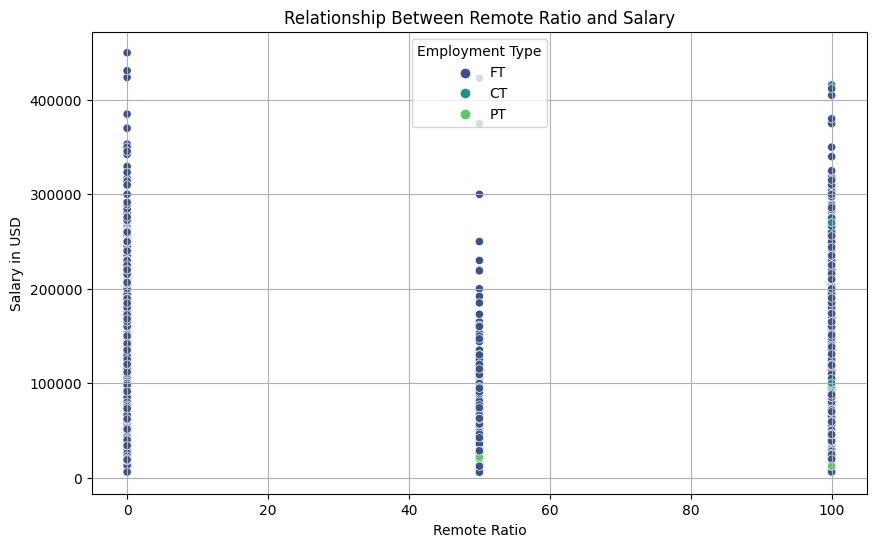

In [15]:
# Create a scatter plot using Seaborn

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='remote_ratio', y='salary_in_usd', hue='employment_type', palette='viridis')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.title('Relationship Between Remote Ratio and Salary')

# Legend position and font

legend = plt.legend(title='Employment Type', loc='best')
for label in legend.get_texts():
    label.set_fontsize(10)

plt.grid(True)
plt.show()


Are there specific job titles that command higher salaries within the field?

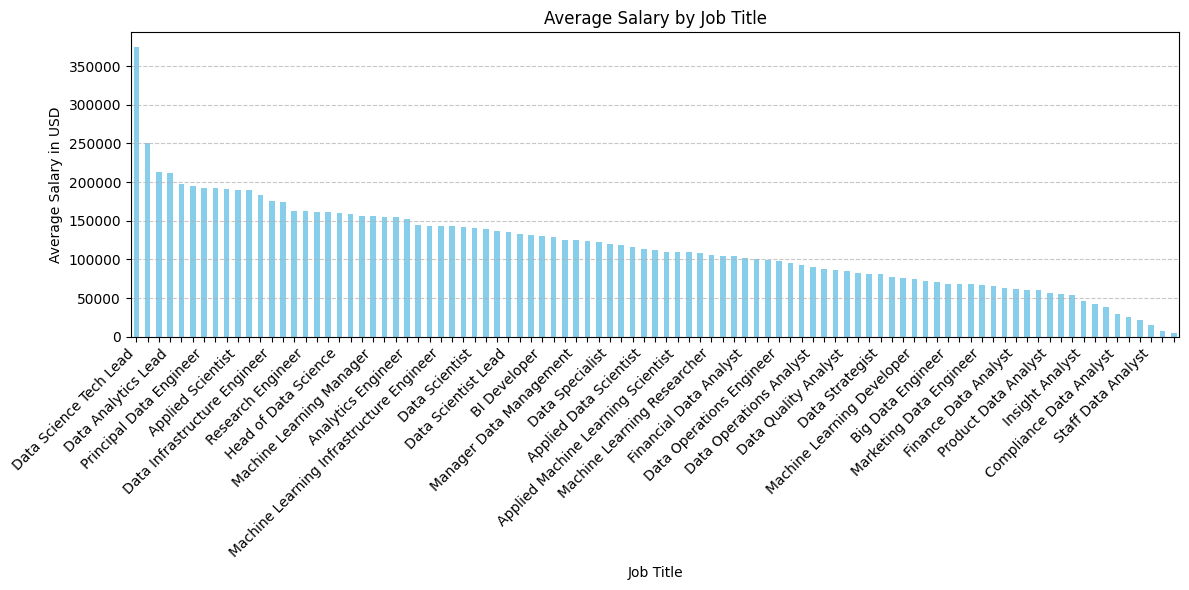

In [16]:
# Calculate the average salary for each job title
average_salaries = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# Plotting a grouped bar plot with rotated x-axis labels
plt.figure(figsize=(12, 6))
bar_plot = average_salaries.plot(kind='bar', color='skyblue')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by Job Title')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show every 3rd label to avoid overcrowding
n = 3
for index, label in enumerate(bar_plot.get_xaxis().get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)

plt.tight_layout()
plt.show()

Let us view the top 15 roles

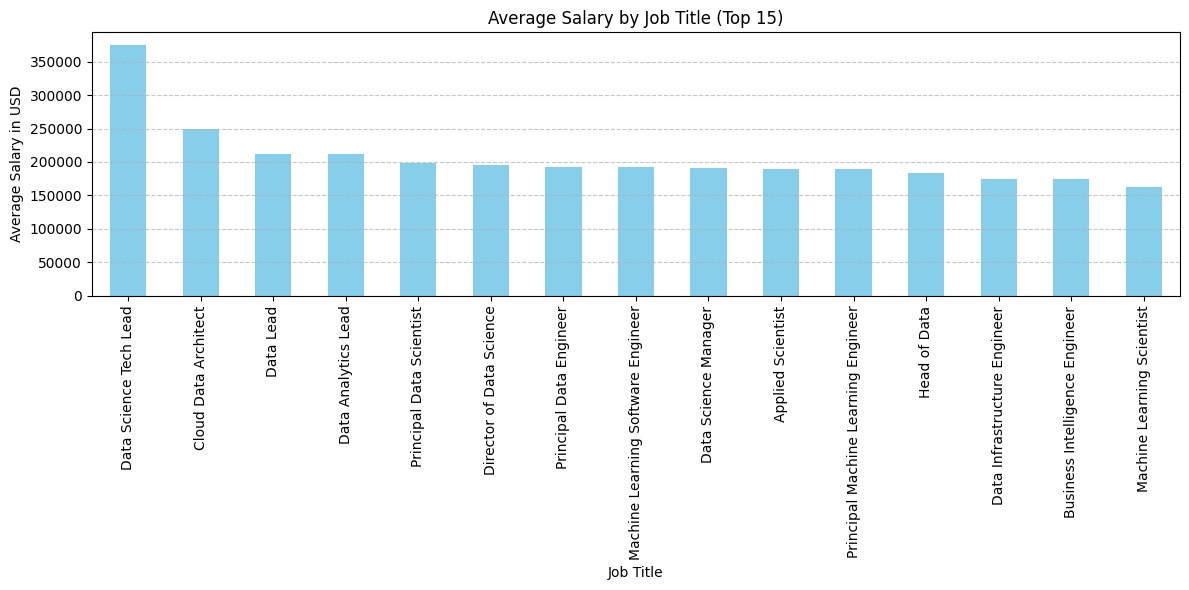

In [17]:


# Calculate the average salary for each job title
#average_salaries = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# Select a subset of job titles to display (e.g., the top 10)
num_titles_to_display = 15
average_salaries_subset = average_salaries.head(num_titles_to_display)

# Plotting a grouped bar plot using Matplotlib
plt.figure(figsize=(12, 6))
average_salaries_subset.plot(kind='bar', color='skyblue')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by Job Title (Top 15)')
#plt.xticks(rotation=45)  # Rotate the x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The correlation between company size and data science salaries

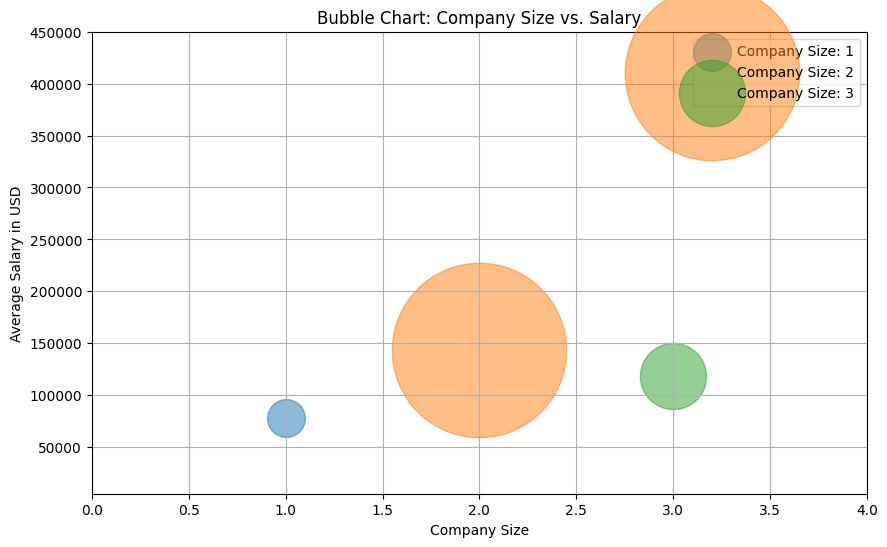

In [18]:
# Map company size to a numerical value for positioning on the x-axis
size_mapping = {'S': 1, 'M': 2, 'L': 3}  # Small, Medium, Large
df['company_size_numeric'] = df['company_size'].map(size_mapping)

# Calculate the average salary for each combination of company size and salary
average_salaries = df.groupby(['company_size', 'company_size_numeric'])['salary_in_usd'].mean().reset_index()

# Calculate bubble sizes based on the number of occurrences or data points
bubble_sizes = df.groupby(['company_size', 'company_size_numeric']).size().reset_index(name='count')

# Create a bubble chart using Matplotlib
plt.figure(figsize=(10, 6))

for size in size_mapping.values():
    subset = average_salaries[average_salaries['company_size_numeric'] == size]
    sizes_subset = bubble_sizes[bubble_sizes['company_size_numeric'] == size]

    plt.scatter(subset['company_size_numeric'], subset['salary_in_usd'], s=sizes_subset['count'] * 5, label=f'Company Size: {size}', alpha=0.5)

plt.xlabel('Company Size')
plt.ylabel('Average Salary in USD')
plt.title('Bubble Chart: Company Size vs. Salary')
plt.legend()
plt.grid(True)

# Adjusting the limits of the axes to fit the bubbles
plt.xlim(0, 4)  # Adjust as needed
plt.ylim(df['salary_in_usd'].min(), df['salary_in_usd'].max())  # Set the salary range

plt.show()

# The Legend titles appear as the size of the bubbles in graph. Still working on this.